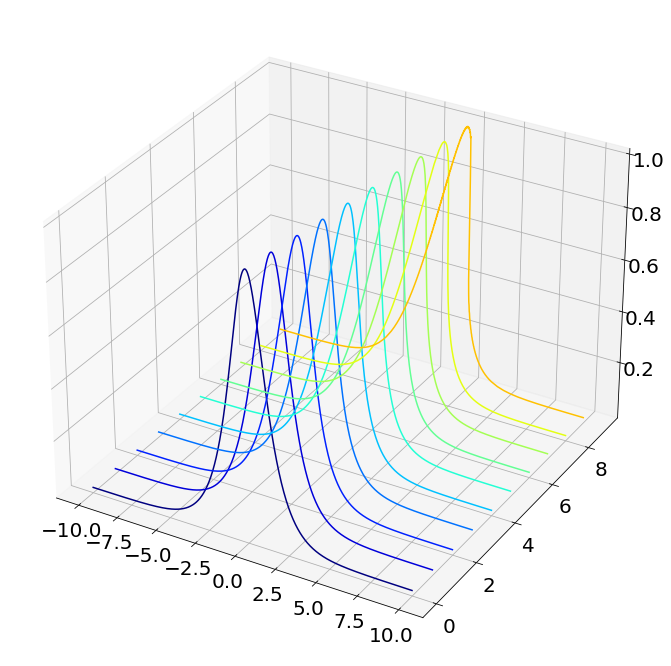

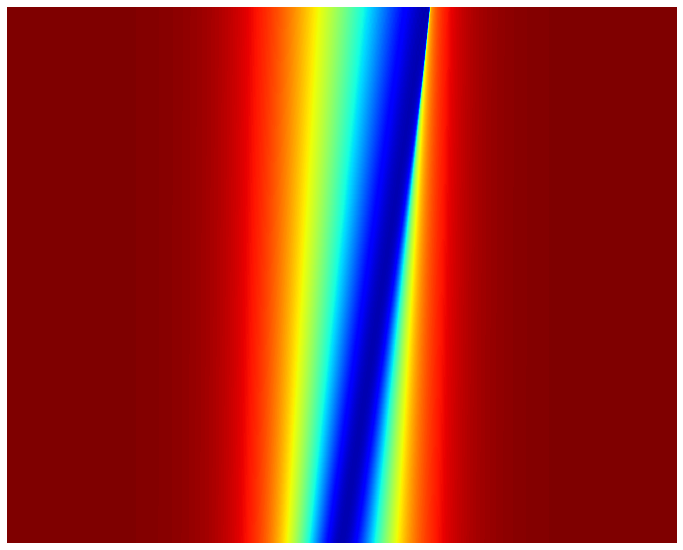

In [6]:
#import necessary libraries
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
plt.rcParams['figure.figsize'] = [12,12]
plt.rcParams.update({'font.size': 20})

nu = 0.001 # diffusion constant
L = 20  #Length of domain
N = 1000    #number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx)  #Define x domain

#Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N,dx)

#Initial condition
u0 = 1/np.cosh (x)

#Simulate PDE in spatial domain
dt = 0.025
t = np.arange(0,100*dt,dt)

def rhsBurgers(u,t,kappa,nu):
    uhat = np.fft.fft(u)
    d_uhat = (1j)*kappa*uhat
    dd_uhat = -np.power(kappa,2)*uhat
    d_u = np.fft.ifft(d_uhat)
    dd_u = np.fft.ifft(dd_uhat)
    du_dt = nu*dd_u - u*d_u
    return du_dt.real

u = odeint(rhsBurgers,u0,t,args=(kappa,nu))

#Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:],color=cm.jet(j*20))

#Image plot
plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.set_cmap('jet_r')
plt.show()